# Importing Necessary Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
project_data = pd.read_csv('PRNN.csv')
project_data


,ID,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [63]:
project_data.shape

(569, 32)

In [64]:
project_data

,ID,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Checking Null values in data

In [65]:
project_data.isna().sum()

ID                 0
Diagnosis          0
RadiusM            0
TextureM           0
PerimeterM         0
AreaM              0
SmoothnessM        0
CompactnessM       0
ConcavityM         0
ConcavePointsM     0
SymmetryM          0
FdimensionM        0
RadiusSE           0
TextureSE          0
PerimeterSE        0
AreaSE             0
SmoothnessSE       0
CompactnessSE      0
ConcavitySE        0
ConcavePointsSE    0
SymmetrySE         0
FdimensionSE       0
RadiusW            0
TextureW           0
PerimeterW         0
AreaW              0
SmoothnessW        0
CompactnessW       0
ConcavityW         0
ConcavePointsW     0
SymmetryW          0
FdimensionW        0
dtype: int64

### Undersating Features Data types

In [66]:
project_data.dtypes

ID                   int64
Diagnosis           object
RadiusM            float64
TextureM           float64
PerimeterM         float64
AreaM              float64
SmoothnessM        float64
CompactnessM       float64
ConcavityM         float64
ConcavePointsM     float64
SymmetryM          float64
FdimensionM        float64
RadiusSE           float64
TextureSE          float64
PerimeterSE        float64
AreaSE             float64
SmoothnessSE       float64
CompactnessSE      float64
ConcavitySE        float64
ConcavePointsSE    float64
SymmetrySE         float64
FdimensionSE       float64
RadiusW            float64
TextureW           float64
PerimeterW         float64
AreaW              float64
SmoothnessW        float64
CompactnessW       float64
ConcavityW         float64
ConcavePointsW     float64
SymmetryW          float64
FdimensionW        float64
dtype: object

In [67]:
X = project_data.drop(['Diagnosis','ID'],axis=1)

In [68]:
project_data['Diagnosis'] = project_data['Diagnosis'].map({'M':1,'B':0})

In [69]:
project_data.drop('ID',axis=1,inplace=True)

In [70]:
y = project_data['Diagnosis']

In [71]:
project_data

,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,SymmetryM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Correlation Matrix

In [72]:
project_data_corr = project_data.corr()
project_data_corr

,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,SymmetryM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
Diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
RadiusM,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
TextureM,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
PerimeterM,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
AreaM,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
SmoothnessM,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
CompactnessM,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
ConcavityM,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
ConcavePointsM,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
SymmetryM,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


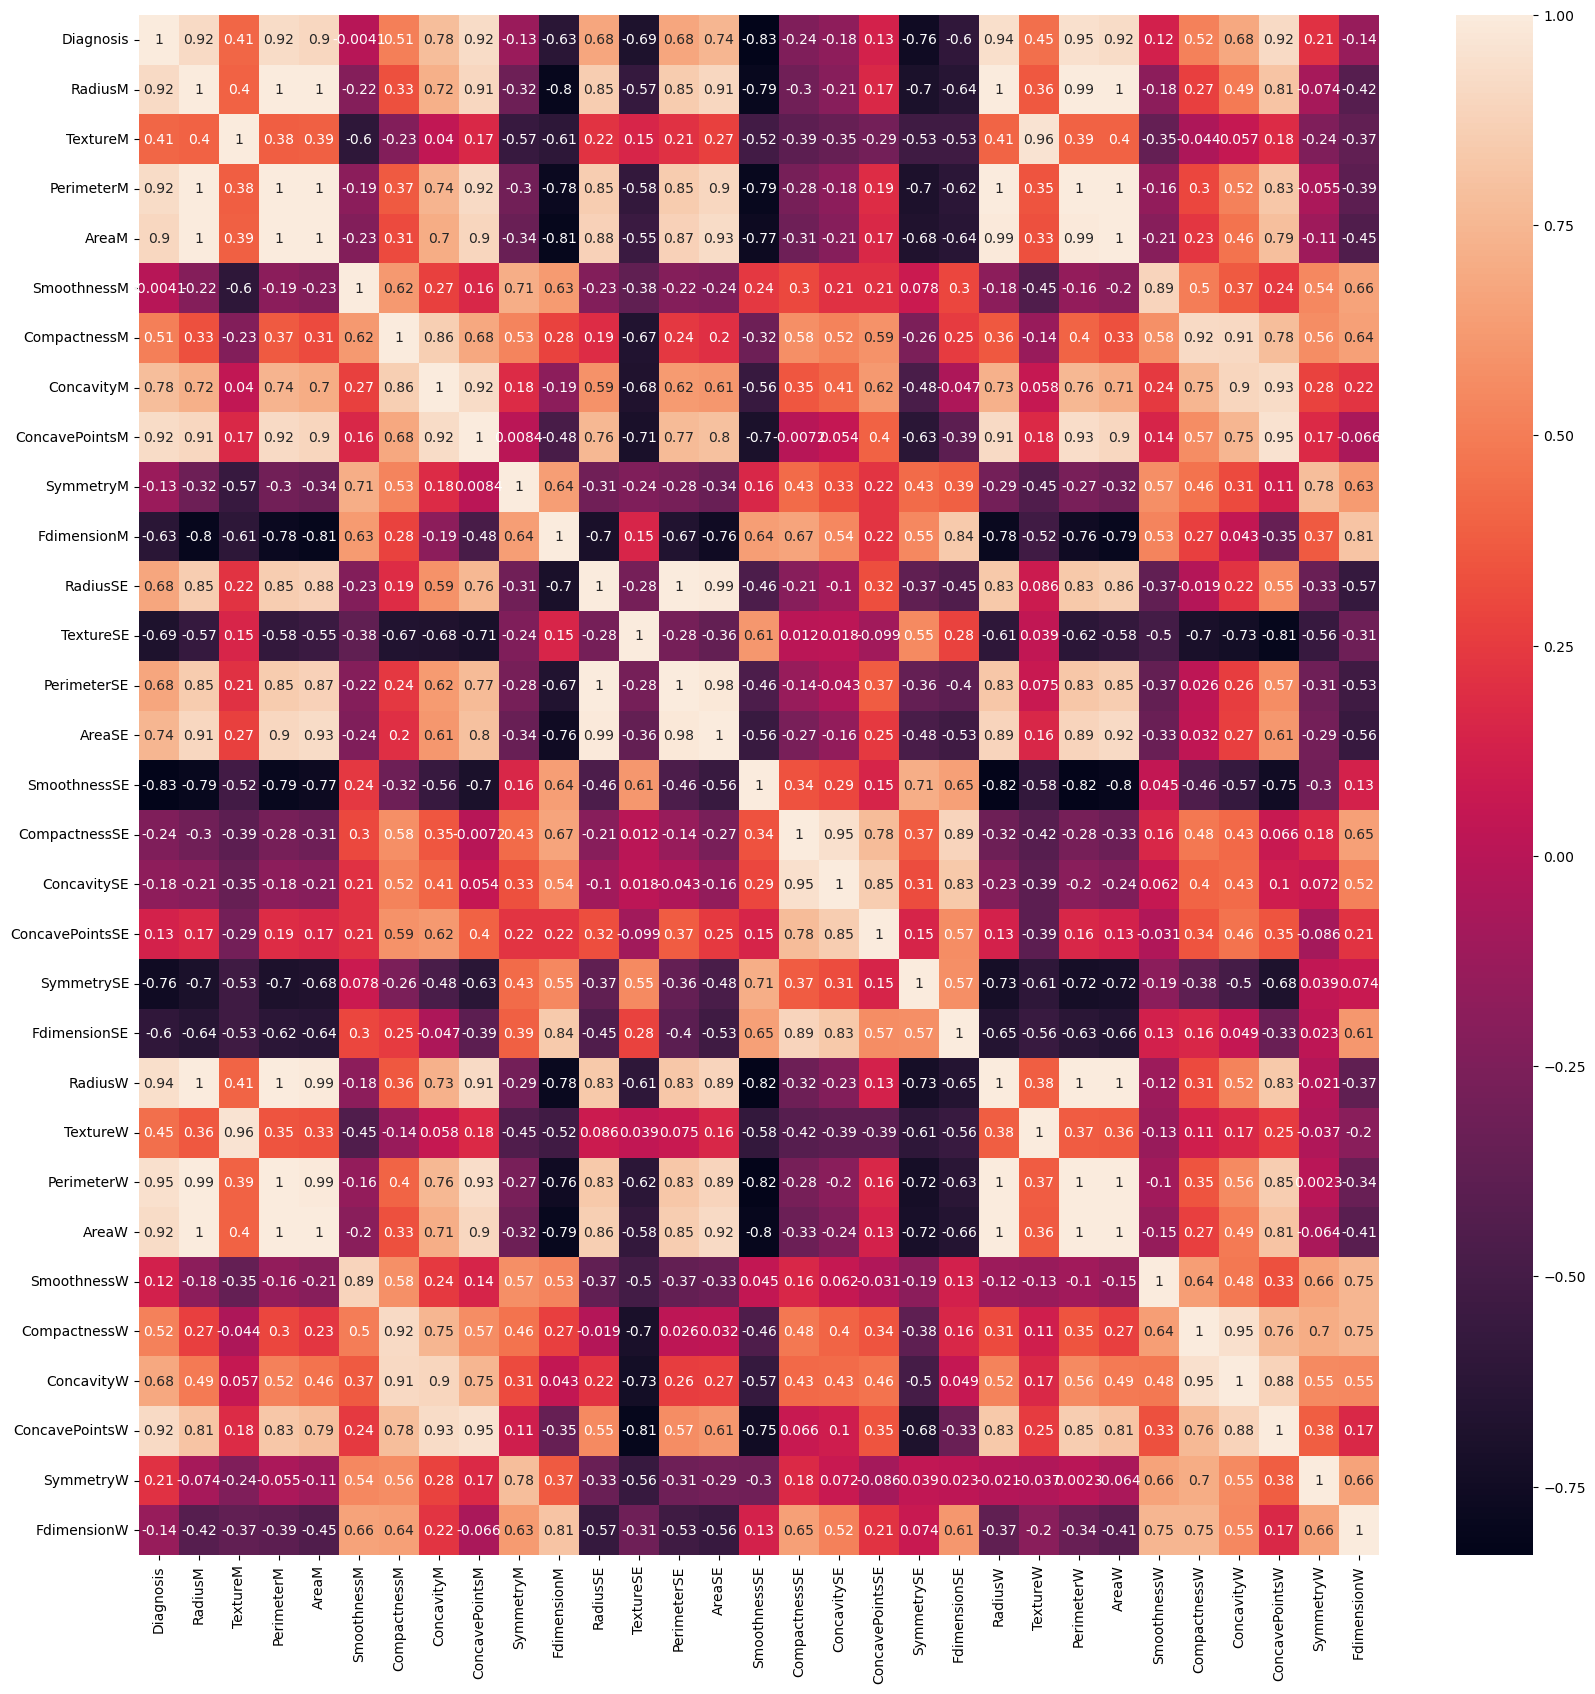

In [73]:
plt.figure(figsize=(20,20))
sn.heatmap(project_data_corr.corr(), annot=True)
plt.show()

### Feature Selection using forward Selection Method

In [74]:
import statsmodels.api as sm
def forwardSelection(X, y, model_type ="logistic",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Forward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __forwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)
    
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Backward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression    
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __forwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):

    iterations_log = ""
    cols = X.columns.tolist()
    
    def regressor(y,X, model_type=model_type):
        if model_type == "linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    
    selected_cols = ["intercept"]
    other_cols = cols[:]
    other_cols.remove("intercept")
    
    model = regressor(y, X[selected_cols])
    
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    
    for i in range(X.shape[1]):
        pvals = pd.DataFrame(columns = ["Cols","Pval"])
        for j in other_cols:
            model = regressor(y, X[selected_cols+[j]])
            pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
        pvals = pvals.sort_values(by = ["Pval"]).reset_index(drop=True)
        pvals = pvals[pvals.Pval<=sl]
        if pvals.shape[0] > 0:
            
            model = regressor(y, X[selected_cols+[pvals["Cols"][0]]])
            iterations_log += str("\nEntered : "+pvals["Cols"][0] + "\n")    
            iterations_log += "\n\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n\n"
                    
        
            if  elimination_criteria == "aic":
                new_criteria = model.aic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tAIC :", model.aic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break
            elif  elimination_criteria == "bic":
                new_criteria = model.bic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tBIC :", model.bic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break        
            elif  elimination_criteria == "r2" and model_type =="linear":
                new_criteria = model.rsquared
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tR2 :", model.rsquared)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break           
            elif  elimination_criteria == "adjr2" and model_type =="linear":
                new_criteria = model.rsquared_adj
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tAdjR2 :", model.rsquared_adj)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("Break : Criteria")
                    break
            else:
                print("Entered :", pvals["Cols"][0])
                selected_cols.append(pvals["Cols"][0])
                other_cols.remove(pvals["Cols"][0])            
                
        else:
            print("Break : Significance Level")
            break
        
    model = regressor(y, X[selected_cols])
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    print(model.summary())
    print("AIC: "+str(model.aic))
    print("BIC: "+str(model.bic))
    print("Final Variables:", selected_cols)

    return selected_cols, iterations_log

def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues.values[1:])
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    return cols, iterations_log

### Selection Critera "AIC"

In [75]:
model = forwardSelection(X,y,elimination_criteria = "aic")

C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:93: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.660316
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.289992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.568119
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.267561
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286166
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.592222
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.447093
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.336755
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.227525
         Iterations 8
Optimization te

C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureW

Optimization terminated successfully.
         Current function value: 0.093198
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.092891
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.094443
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.088649
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.089170
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.093488
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.094220
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.087077
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.094293
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureW

Optimization terminated successfully.
         Current function value: 0.072739
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.066971
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.072465
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.069534
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.066951
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.072692
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.068637
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.067957
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.069198
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureW

Optimization terminated successfully.
         Current function value: 0.057620
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.056799
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.061158
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.057199
         Iterations 12
Entered : TextureSE 	AIC : 85.09195081603276
Optimization terminated successfully.
         Current function value: 0.055039
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.057106
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.054828
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.056871
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.054843
         Iterations 12
Optimization terminated succ

C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureW

Optimization terminated successfully.
         Current function value: 0.047430
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.047855
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.047825
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.047788
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.047960
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.046922
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.046983
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.047869
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.047821
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
C:\Users\13132\AppData\Local\Temp\ipykernel_10984\1392579163.py:141: FutureW

### Including most significant features

In [76]:
X = project_data[['ConcavityM', 'ConcavePointsM', 'TextureW', 'RadiusW', 'PerimeterM', 'PerimeterSE', 'SmoothnessW', 'CompactnessSE', 'TextureSE', 'AreaSE', 'ConcavePointsW']]


### Data Standarization

In [77]:
X = StandardScaler().fit_transform(X)

In [78]:
X.shape,y.shape

((569, 11), (569,))

### Data Validation

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y,shuffle=True)

In [80]:
X_train.shape,y_train.shape

((455, 11), (455,))

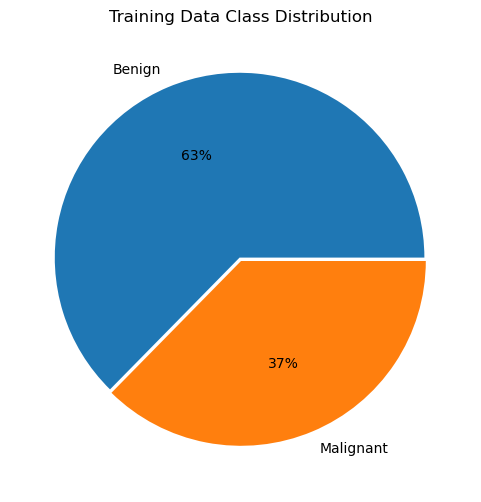

In [81]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(x = y_train.value_counts(),labels=['Benign','Malignant'], explode=[0.02,0],autopct='%1.0f%%')
plt.title("Training Data Class Distribution")
plt.show()

In [82]:
X_test.shape,y_test.shape

((114, 11), (114,))

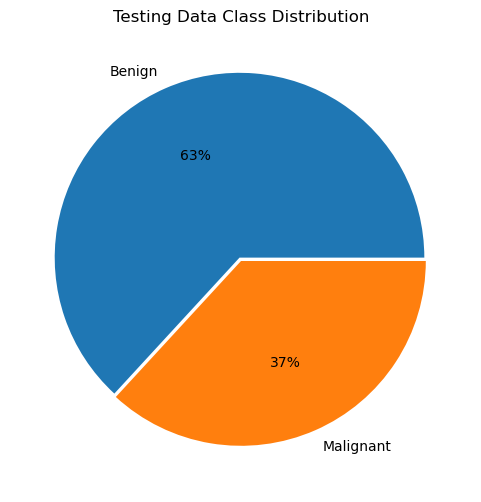

In [83]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(x = y_test.value_counts(),labels=['Benign','Malignant'], explode=[0.02,0],autopct='%1.0f%%')
plt.title("Testing Data Class Distribution")
plt.show()

### Model Training - MLP

In [84]:
project_model = Sequential()
project_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
project_model.add(Dense(32, activation='relu'))
project_model.add(Dense(1, activation='sigmoid'))
project_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the model
history = project_model.fit(
    X_train, y_train, epochs=20, batch_size=32,
    validation_split=0.2, verbose=1
)

y_train_pred_probs = project_model.predict(X_train)
y_train_pred = np.round(y_train_pred_probs).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred_probs = project_model.predict(X_test)
y_test_pred = np.round(y_test_pred_probs).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)
accuracy_table = pd.DataFrame({
    'Model': ['MLP'],
    'Training Accuracy': [train_accuracy],
    'Testing Accuracy': [test_accuracy]
})
print(accuracy_table)


Epoch 1/20
12/12 [==============================] - 0s 9ms/step - loss: 0.6322 - accuracy: 0.6978 - val_loss: 0.5122 - val_accuracy: 0.8681
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.8984 - val_loss: 0.3823 - val_accuracy: 0.9121
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.9368 - val_loss: 0.2981 - val_accuracy: 0.9231
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2466 - accuracy: 0.9588 - val_loss: 0.2401 - val_accuracy: 0.9341
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1909 - accuracy: 0.9670 - val_loss: 0.1996 - val_accuracy: 0.9341
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.9753 - val_loss: 0.1736 - val_accuracy: 0.9341
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.9780 - val_loss: 0.1557 - val_accuracy: 0.9451
Epoch 8/20
12/12 [==

### Confusion Matrix

#### Training

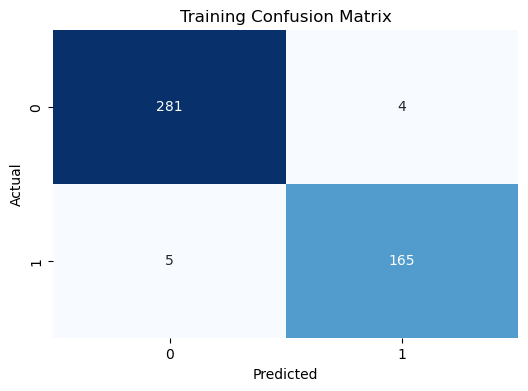

In [85]:
project_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sn.heatmap(project_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#### Testing

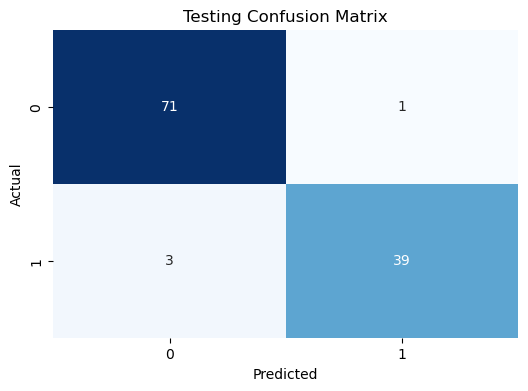

In [86]:
project_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sn.heatmap(project_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
